<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#简介" data-toc-modified-id="简介-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>简介</a></span></li><li><span><a href="#OpenCV中最常用的特征检测和提取算法" data-toc-modified-id="OpenCV中最常用的特征检测和提取算法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>OpenCV中最常用的特征检测和提取算法</a></span></li><li><span><a href="#特征定义" data-toc-modified-id="特征定义-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>特征定义</a></span></li><li><span><a href="#Harris角点检测" data-toc-modified-id="Harris角点检测-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Harris角点检测</a></span></li><li><span><a href="#SIFT(Scale-Invariant-Feature-Transform)-尺度不变特征变换" data-toc-modified-id="SIFT(Scale-Invariant-Feature-Transform)-尺度不变特征变换-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SIFT(Scale-Invariant Feature Transform) 尺度不变特征变换</a></span></li><li><span><a href="#SURF(Speeded-Up-Robust-Features)-加速稳健特征" data-toc-modified-id="SURF(Speeded-Up-Robust-Features)-加速稳健特征-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>SURF(Speeded-Up Robust Features) 加速稳健特征</a></span></li><li><span><a href="#ORB(Oriented-FAST-and-Rotated-BRIEF)" data-toc-modified-id="ORB(Oriented-FAST-and-Rotated-BRIEF)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ORB(Oriented FAST and Rotated BRIEF)</a></span><ul class="toc-item"><li><span><a href="#FAST(Features-from-Accelerated-Segment-Test)" data-toc-modified-id="FAST(Features-from-Accelerated-Segment-Test)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>FAST(Features from Accelerated Segment Test)</a></span></li><li><span><a href="#BRIEF(Binary-Robust-Independent-Elementary-Features)" data-toc-modified-id="BRIEF(Binary-Robust-Independent-Elementary-Features)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>BRIEF(Binary Robust Independent Elementary Features)</a></span></li><li><span><a href="#Brute-Force-暴力匹配" data-toc-modified-id="Brute-Force-暴力匹配-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Brute-Force 暴力匹配</a></span></li><li><span><a href="#ORB特征匹配" data-toc-modified-id="ORB特征匹配-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>ORB特征匹配</a></span></li><li><span><a href="#KNN(K-最近邻匹配)" data-toc-modified-id="KNN(K-最近邻匹配)-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>KNN(K-最近邻匹配)</a></span></li><li><span><a href="#FLANN(Fast-Library-for-Approximate-Nearest-Neighbors)-快速最近邻搜索包" data-toc-modified-id="FLANN(Fast-Library-for-Approximate-Nearest-Neighbors)-快速最近邻搜索包-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>FLANN(Fast Library for Approximate Nearest Neighbors) 快速最近邻搜索包</a></span></li><li><span><a href="#FLANN-单应性匹配" data-toc-modified-id="FLANN-单应性匹配-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>FLANN 单应性匹配</a></span></li></ul></li></ul></div>

## 简介
> OpenCV可以检测图像的主要特征，然后提取这些特征，使其成为图像描述符；这些图像特征可作为图像搜索的数据库。通过单应性(homography)来判断一个图像是否存在于另一个图像中。

## OpenCV中最常用的特征检测和提取算法
> * Harris: 该算法用于检测角点
> * SIFT: 该算法用于检测斑点(blob)
> * SURF: 该算法用于检测斑点
> * FAST: 该算法用于检测角点
> * BRIEF: 该算法用于检测斑点
> * ORB: 该算法代表带方向的`FAST`算法与具有旋转不变性的`BRIEF`算法通过以下方式进行特征匹配：
>> * 暴力(Brute-Force)匹配法
>> * 基于FLANN的匹配法

## 特征定义
> 特征就是有意义的图像区域，该区域具有独特性或易于识别性。因此角点及高密度区域是很好的特征，而大量重复的模式或低密度区域则部署好的特征  

> 边缘可以将图像分成两个区域，因此可以看作好的特征；斑点(与周围有很大差别的图像区域)也是有意义的特征。大多数特征检测算法都会涉及图像的角点，边和斑点的识别

## Harris角点检测

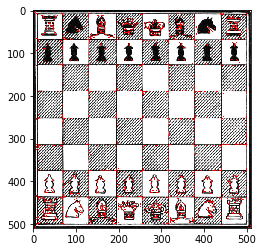

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/chess_board.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
# ksize参数指定了Sobel算子的核(kernel)，Sobel算子通过对图像行，列的变化来检测边缘；
# 该参数定义了角点检测的敏感度，其取值必须介于 3 和 31 之间的奇数
dst = cv2.cornerHarris(gray, 2, 23, 0.04)

# Harris角点检测的结果是一个由角点分数构成的灰度图像。
# 选取适当的阈值对结果图像进行二值化就检测到了图像中的角点
img[dst > 0.01 * dst.max()] = [255, 0, 0]

plt.imshow(img)

## SIFT(Scale-Invariant Feature Transform) 尺度不变特征变换

> SIFT 会对不同的图像尺度(尺度不变特征变换)输出相同的结果

> SIFT 并不检测关键点(关键点由 Difference of Gaussians 检测)，但 SIFT 会通过一个特征向量来描述关键点周围区域的情况

> DoG 是对同一图像使用不同高斯滤波器所得到的结果，DoG操作的最终结果会得到感兴趣的区域(关键点)

> 关键点有如下常用属性：
>> * pt: 表示图像中关键点的 x 坐标和 y 坐标
>> * size: 表示特征的直径
>> * angle: 表示特征的方向
>> * response: 表示关键点的强度
>> * octave: 表示特征所在金字塔的层级

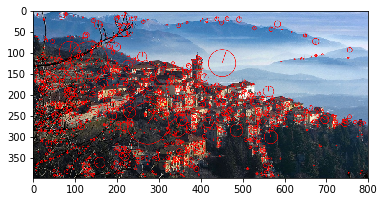

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/varese.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SIFT对象会使用DoG检测关键点，并且对每个关键点周围的区域计算特征向量
sift = cv2.xfeatures2d.SIFT_create()
# 由方法的名称可知需要执行两个主要操作: 检测 & 计算
# 操作的返回值是关键点信息(关键点)和描述符
keypoints, descriptor = sift.detectAndCompute(gray, None)

# drawKeypoints(image, keypoints, outImage[, color[, flags]]) -> outImage
img = cv2.drawKeypoints(image=img, outImage=img, keypoints=keypoints, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 0, 255))

# matplotlib使用的颜色模式是流行的RGB模式，而opencv使用的是BGR模式，即RGB的倒序模式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## SURF(Speeded-Up Robust Features) 加速稳健特征
> SURF 算法比 SIFT 快好几倍，它吸收了 SIFT 算法的思想
>> SIFT 和 SURF 都受专利保护，因此，被归到OpenCV的`xfeatures2d`模块中

> SURF 采用快速`Hessian`算法检测关键点，而`SURF`会提取特征 (SIFT分别采用`DoG`和`SIFT`来检测关键点并提取关键点周围的特征)

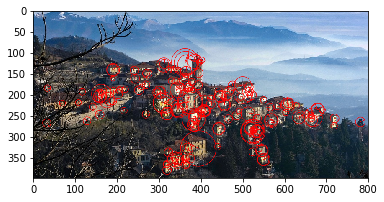

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/varese.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 指定Hessian阀值为8000; 阀值越高, 能识别的特征越少
# 因此可以采用试探法来得到最优检测结果
surf = cv2.xfeatures2d.SURF_create(8000)
# 由方法的名称可知需要执行两个主要操作: 检测 & 计算
# 操作的返回值是关键点信息(关键点)和描述符
keypoints, descriptor = surf.detectAndCompute(gray, None)

# drawKeypoints(image, keypoints, outImage[, color[, flags]]) -> outImage
img = cv2.drawKeypoints(image=img, outImage=img, keypoints=keypoints, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 0, 255))

# matplotlib使用的颜色模式是流行的RGB模式，而opencv使用的是BGR模式，即RGB的倒序模式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## ORB(Oriented FAST and Rotated BRIEF)
>* ORB是用来替代`SIFT`和`SURF`的，ORB有更快的速度
>* ORB将基于`FAST`关键点检测的技术和基于`BRIEF`描述符的技术相结合

### FAST(Features from Accelerated Segment Test)
> 该算法会在像素周围绘制一个圆，该圆包括16个像素；FAST会将每个像素与加上一个阀值的圆心像素值进行比较，若有连续、比加上一个阀值的圆心的像素值还亮或暗的像素，则可认为圆心是角点

> FAST方法与阀值紧密相关，这就要求开发人员输入参数（SIFT不需要这样的输入）

### BRIEF(Binary Robust Independent Elementary Features)
> 该算法并不是特征检测算法，它只是一个描述符

> BRIEF是目前最快的描述符，其理论相当复杂

>> 什么是描述符？  
关键点描述符是图像的一种表示，可以通过比较两个图像的关键点描述符，找到它们的共同之处；所以，描述符可以作为特征匹配的一种方法

### Brute-Force 暴力匹配
> 暴力匹配方法是一种描述符匹配方法，该方法会比较两个描述符，并产生匹配结果的列表

> 称为暴力匹配的原因是该算法基本上不涉及优化，第一个描述符的所有特征都用来和第二个描述符的特征进行比较；每次比较都会给出一个距离值，而最好的比较结果会被认为是一个匹配

> 通过cv2.BFMatcher()可以创建一个BFMatcher对象，该对象有两个方法:
>> * BFMatcher.match: 返回最佳匹配
```python
match(self, queryDescriptors, trainDescriptors, mask=None)
```
>> * cv2.drawMatches: 针对BFMatcher.match返回的最佳匹配点来绘制直线(将两幅图像先水平排列，然后在最佳匹配的点之间绘制直线)
```python
cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches1to2, outImg, matchColor=None, singlePointColor=None, matchesMask=None, flags=None)
```
>> * BFMatcher.knnMatch: 为每个关键点返回`k`个最佳匹配(降序排列后取前`k`个)
```python
knnMatch(self, queryDescriptors, trainDescriptors, k, mask=None, compactResult=None)
```
>> * cv2.drawMatchesKnn: 针对BFMatcher.knnMatch返回的每个关键点和它的`k`个最佳匹配绘制匹配线(如果k=2，就会为每个关键点绘制两条最佳匹配直线)
```python
cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches1to2, outImg, matchColor=None, singlePointColor=None, matchesMask=None, flags=None)
```

> 匹配器对象： `matchers = bf.match(des1, des2)` 返回的是一个DMatch对象列表，其具有如下属性：
>> * DMatch.distance: 描述符之间的距离，越小越好
>> * DMatch.trainIdx: 目标图像中描述符的索引
>> * DMatch.queryIdx: 查询图像中描述符的索引
>> * DMatch.imgIdx: 目标图像的索引

### ORB特征匹配
> ORB旨在优化和加快操作速度，以旋转感知(rotation-aware)的方式使用BRIEF，这样即使在训练图像与查询图像之间旋转差别很大的情况下也能够提高匹配效果

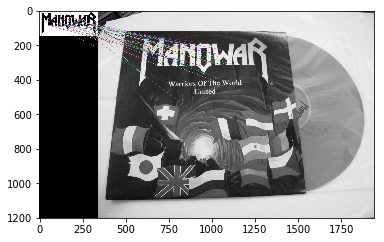

In [15]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('img/manowar_logo.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img/manowar_single.jpg', cv2.IMREAD_GRAYSCALE)

# 创建ORB特征检测器
orb = cv2.ORB_create()
# 对查询图像和训练图像进行检测，计算关键点和描述符
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 通过暴力匹配遍历描述符，计算匹配质量(距离)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
# 根据匹配质量(距离)进行排序
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:40], img2, flags=2)
plt.imshow(img3)

### KNN(K-最近邻匹配)
> knnMatch 在匹配过程中很可能发生错误，错误的匹配主要有两种：
>> * 匹配的特征点是错误的
>> * 图像上的特征点无法匹配

> 常用的错误校验方法有：
>> * 交叉过滤： 如果第一幅图像的一个特征点和第二幅图像的一个特征点相匹配，则进行一个相反的检查，即将第二幅图像上的特征点与第一幅图像上相应特征点进行匹配，如果匹配成功，则认为这对匹配是正确的
```python
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.knnMatch(des1, des2, k=1)
```
>> * 比率测试： 当设置K = 2，即对每个匹配返回两个最近邻描述符，仅当第一个匹配与第二个匹配之间的距离足够小时，才认为这是一个匹配
```python
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1, des2, k=2)
```

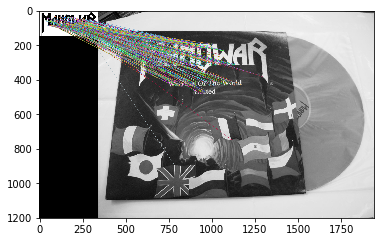

In [18]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('img/manowar_logo.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img/manowar_single.jpg', cv2.IMREAD_GRAYSCALE)

# 创建ORB特征检测器
orb = cv2.ORB_create()
# 对查询图像和训练图像进行检测，计算关键点和描述符
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 通过暴力匹配遍历描述符，计算匹配质量(距离)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# 比率测试：K=2即对每个匹配返回两个最邻近描述符，仅当第一个匹配与第二个匹配之间的距离足够小
# 才认为这是一个匹配
matches = bf.knnMatch(des1, des2, k=2)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, img2, flags=2)
plt.imshow(img3)

### FLANN(Fast Library for Approximate Nearest Neighbors) 快速最近邻搜索包
> FLANN具有一种内部机制，可以根据数据本身选择最合适的算法来处理数据集，FLANN比其它最近邻搜索软件快10倍

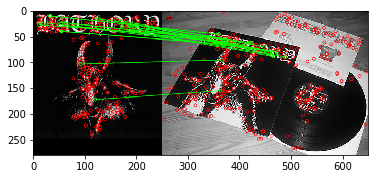

In [20]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 按照灰度图片读入
img1 = cv2.imread("img/bathory_album.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("img/bathory_vinyls.jpg", cv2.IMREAD_GRAYSCALE)
# 创建sift检测器
sift = cv2.xfeatures2d.SIFT_create()
# 查找监测点和匹配符
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
"""
* keypoint是检测到的特征点的列表
* descriptor是检测到特征的局部图像的列表
"""

# 可选值有: LinearIndex, KTreeIndex, KMeansIndex, CompositeIndex 和 AutotuneIndex
# 这里选择的是 KTreeIndex (只需要指定待处理核密度树的数量, 理想的数量在 1~16 之间)
FLANN_INDEX_KDTREE = 0
indexParams = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
# 用来指定索引树要被遍历的次数，该值越高，计算匹配花费的时间越长，但也会越准确
searchParams = dict(checks=50)
# 获取flann匹配器, 匹配效果很大程度上取决于输入
# 通常 5 kd-trees 和 50 checks 总能取得具有合理精度的结果, 而且在很短时间内就能完成
flann = cv2.FlannBasedMatcher(indexParams, searchParams)
# 进行匹配
matches = flann.knnMatch(des1, des2, k=2)
# 准备空的掩膜 画好的匹配项
matchesMask = [[0, 0] for i in range(len(matches))]

for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i] = [1, 0]

drawPrams = dict(matchColor=(0, 255, 0),
                 singlePointColor=(255, 0, 0),
                 matchesMask=matchesMask,
                 flags=0)
# 匹配结果图片
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **drawPrams)
plt.imshow(img3)

### FLANN 单应性匹配
> 单应性是一个条件，该条件表明当两幅图像中的一副出现投影畸变时，它们还能彼此匹配。

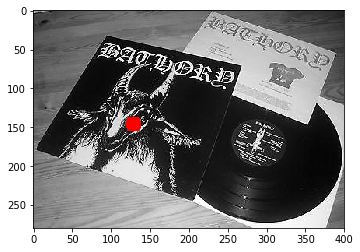

In [4]:
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

MIN_MATCH_COUNT = 10

# img1 = cv2.imread('img/bb.jpg', 0)
# img2 = cv2.imread('img/color2_small.jpg', 0)

img1 = cv2.imread("img/bathory_album.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("img/bathory_vinyls.jpg", cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    h, w = img1.shape
    pts = np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1, 1, 2)

    dst = cv2.perspectiveTransform(pts, M)
    # print dst[0]
    # print dst[1]
    # print dst[2]
    # print dst[3]
    # print '*' * 100

    # 获取中心点位置
    x_point = (np.max(np.squeeze(dst)[:, 0]) - np.min(np.squeeze(dst)[:, 0]))/2 + np.min(np.squeeze(dst)[:, 0])
    y_point = (np.max(np.squeeze(dst)[:, 1]) - np.min(np.squeeze(dst)[:, 1]))/2 + np.min(np.squeeze(dst)[:, 1])
    # print x_point, y_point

    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    img2 = cv2.circle(img2, (np.int32(x_point), np.int32(y_point)), 10, (255, 0, 0), -1)
    plt.imshow(img2)
    
else:
    print 'Not enough matches are found - %d/%d' % (len(good), MIN_MATCH_COUNT)
    matchesMask = None
